In [1]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import pandas as pd
import xgboost as xgb
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.utils import class_weight
from sklearn.metrics import balanced_accuracy_score
from shapash.explainer.smart_explainer import SmartExplainer
import shap

/home/joaoalves/.local/lib/python3.6/site-packages/numba/core/errors.py:149: UserWarning:

Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9



In [4]:
#MLP for the transitions
file="last_model_dataset.csv"
df=pd.read_csv(file) 
dtypes = df.dtypes.to_dict()

for col_nam, typ in dtypes.items():
    if "Unnamed" in col_nam:
        df.drop(col_nam, axis = 1,inplace = True)

df.drop("Age",axis=1,inplace=True)
df.drop("MMSE",axis=1,inplace=True)
#df.drop("DifMMSE",axis=1,inplace=True)
print(df.shape)

for i in range(len(df["DifAge"])):
    if df["DifAge"][i]==-1:
        df.drop(i,inplace=True)

print(df.shape)

y=df['Label']

df.drop("ID", axis = 1,inplace = True)
df.drop("Label", axis = 1,inplace = True)

print(df.shape)
X=df 

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size=0.20)
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)
clf = MLPClassifier(hidden_layer_sizes=(7,),activation="logistic",solver="adam",random_state=1, max_iter=10000).fit(X_trainscaled, y_train)
y_pred=clf.predict(X_testscaled)
print(clf.score(X_testscaled, y_test)*100)

(168, 1828)
(168, 1828)
(168, 1826)
88.23529411764706


(168, 1828)
(168, 1828)
(168, 1826)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[15:37:24] WARNING: ../src/learner.cc:573: 
Parameters: { "num_classes", "scale_pos_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:37:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


Validation accuracy:       88.24%


Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


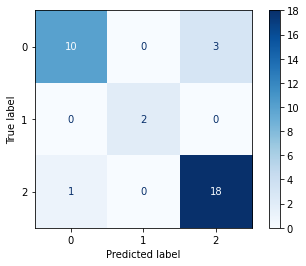

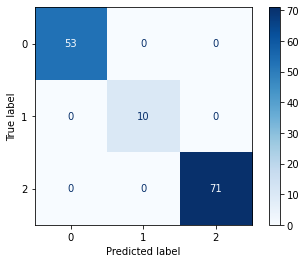

In [2]:
#XGBoost to the transitions
file="last_model_dataset.csv"
df=pd.read_csv(file) 
dtypes = df.dtypes.to_dict()
for col_nam, typ in dtypes.items():
    if "Unnamed" in col_nam:
        df.drop(col_nam, axis = 1,inplace = True)
        
df.drop("Age",axis=1,inplace=True)
df.drop("MMSE",axis=1,inplace=True)
#df.drop("DifMMSE",axis=1,inplace=True)

print(df.shape)

for i in range(len(df["DifAge"])):
    if df["DifAge"][i]==-1:
        df.drop(i,inplace=True)

print(df.shape)


y=df['Label']
df.drop("ID", axis = 1,inplace = True)
df.drop("Label", axis = 1,inplace = True)

print(df.shape)

X=df 
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size=0.20)
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', seed=42, num_classes=3,
    learning_rate=0.01,
    n_estimators=1000,
    max_depth=4,
    min_child_weight=3,
    gamma=0.0,
    reg_alpha=0.0,
    reg_lambda=0.9,                 
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=20)

clf_xgb.fit(x_train,y_train)

y_predict = clf_xgb.predict(x_test)
y_train_predict = clf_xgb.predict(x_train)

#print(f'Training accuracy:        {accuracy_score(y_train,  y_train_predict)*100: .2f}%')
print(f'Validation accuracy:      {accuracy_score(y_test, y_predict)*100: .2f}%')
#print(f'Validation AUC:           {roc_auc_score(y_test, y_predict)*100: .2f}%')

plot_confusion_matrix(clf_xgb,
                    x_test,
                    y_test,
                    values_format='d',
                    cmap='Blues',
                    display_labels=['0', '1', '2']);

plot_confusion_matrix(clf_xgb,
                    x_train,
                    y_train,
                    values_format='d',
                    cmap='Blues',
                    display_labels=['0', '1', '2']);

cm = confusion_matrix(y_test, y_predict)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


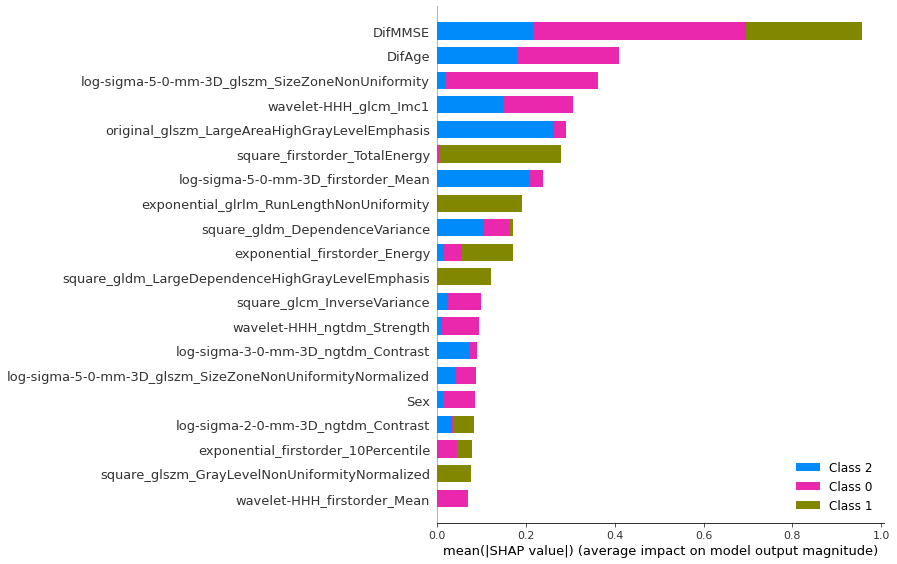

In [11]:
#Shap Values
explainer = shap.Explainer(clf_xgb)
shap_values = explainer.shap_values(X_train)
shap_obj=explainer(X_train)
#shap.plots.beeswarm(shap_obj)
shap.summary_plot(shap_values,X_train)

Feature Importances :  [0.00104272 0.00101461 0.00103266 ... 0.00196468 0.00136335 0.00244529]


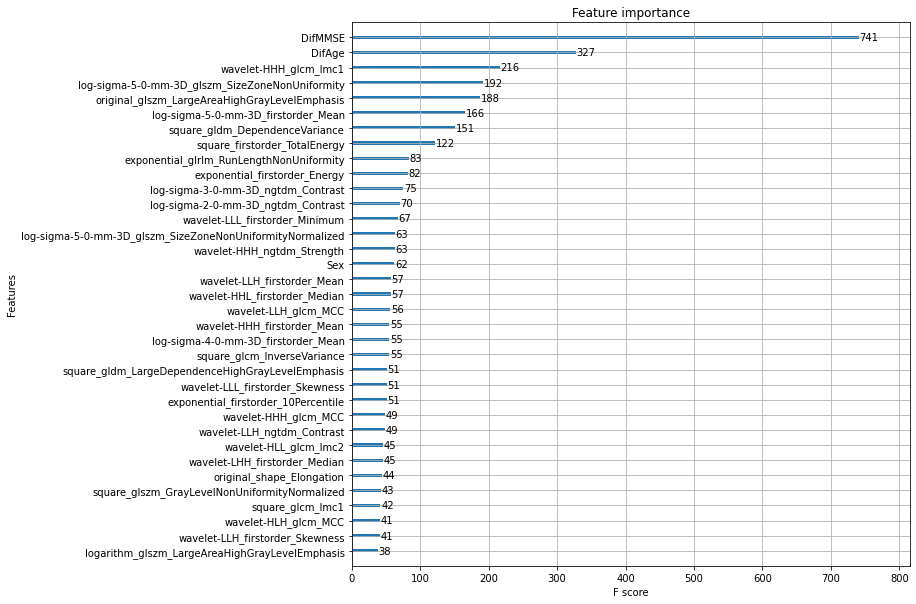

In [37]:
#Feature Importance
from matplotlib import pyplot
from xgboost import plot_importance

print("Feature Importances : ", clf_xgb.feature_importances_)


plot_importance(clf_xgb, max_num_features=35)
plt.rcParams["figure.figsize"] = (5,5)
plt.show()